In [1]:
%pylab inline
import pandas as pd
from pykalman import KalmanFilter

df = pd.read_csv("../data/ChungCheonDC/CompositeETCdata.csv")
df_DC = pd.read_csv("../data/ChungCheonDC/CompositeDCdata.csv")
df_DCprc = pd.read_csv("../data/ChungCheonDC/CompositeDCdata_processed.csv")
df_DCstd = pd.read_csv("../data/ChungCheonDC/CompositeDCstddata.csv")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# missininds = np.arange(df_DC[electrodeID[elecind]].values.size)[np.isnan(df_DC[electrodeID[elecind]].values)]
electrodeID = df_DC.keys()[1:-1]

In [3]:
from scipy import interpolate
sys.path.append("../codes/")
from DCdata import readReservoirDC_all
directory = "../data/ChungCheonDC/"
dat_temp,height_temp, ID = readReservoirDC_all(directory+"20151231180000.apr")
locs = dat_temp[:,:4]
mida = locs[:,:2].sum(axis=1)
midb = locs[:,2:].sum(axis=1)
mid = (mida + midb)*0.5
dz = mida-midb
x = np.linspace(mid.min(), mid.max(), 100)
z = np.linspace(dz.min(), dz.max(), 100)
grid_x, grid_z = np.meshgrid(x,z)

def vizDCtimeSeries(idatum, itime, itime_ref, colors, flag, df_DC):
    fig = plt.figure(figsize = (12, 12))
    ax1 = plt.subplot(411)
    ax2 = plt.subplot(412)
    
    valsratio = df_DC[electrodeID].values[itime,:].flatten() / df_DC[electrodeID].values[itime_ref,:].flatten()
    valsDC = np.log10(df_DC[electrodeID].values[itime,:].flatten())
    valsDCstd = df_DCstd[electrodeID].values[itime,:].flatten()
    grid_rho_ratio = griddata(mid, dz, valsratio, grid_x, grid_z, interp='linear')
    grid_rho_ratio = grid_rho_ratio.reshape(grid_x.shape)
    if flag =="std":
        vmin, vmax = 0, 10
        grid_rho = griddata(mid, dz, valsDCstd, grid_x, grid_z, interp='linear')        
    elif flag =="rho":
        vmin, vmax = np.log10(20), np.log10(200)
        grid_rho = griddata(mid, dz, valsDC, grid_x, grid_z, interp='linear')
    grid_rho = grid_rho.reshape(grid_x.shape)
        
    
    ax1.contourf(grid_x, grid_z, grid_rho, 200, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")    
    vmin, vmax = 0.9, 1.1
    ax2.contourf(grid_x, grid_z, grid_rho_ratio, 200, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")        
    ax1.scatter(mid, dz, s=20, c = valsDC, edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
    ax1.plot(mid, dz, 'k.')
    ax2.scatter(mid, dz, s=20, c = valsratio, edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
    ax2.plot(mid, dz, 'k.')
    
    for i in range(len(colors)):
        ax1.plot(mid[idatum[i]], dz[idatum[i]], 'o', color=colors[i])    
        ax2.plot(mid[idatum[i]], dz[idatum[i]], 'o', color=colors[i])    
        

    ax3 = plt.subplot(413)
    ax3_1 = ax3.twinx()
    df.plot(x='date', y='reservoirH', ax=ax3_1, color='k', linestyle='-', lw=2)
    df.plot(x='date', y='upperH_med', ax=ax3_1, color='b', linestyle='-', lw=2)
    df.plot(x='date', y='Temp (degree)', ax=ax3, color='r', linestyle='-', lw=2)
    df.plot(x='date', y='Rainfall (mm)', ax=ax3, color='b', linestyle='-', marker="o", lw=2)   # ms=4)
    ax3.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
    ax3_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
    itime_ref0 = itime_ref
    itime_ref1 = itime
    ax3.plot(np.r_[itime_ref0, itime_ref0], np.r_[-5, 40], 'k--', lw=2)
    ax3.plot(np.r_[itime_ref1, itime_ref1], np.r_[-5, 40], 'k--', lw=2)

    ax4 = plt.subplot(414)
    ax4_1 = ax4.twinx()
    ax4.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
    ax4.set_yscale('log')
    temp = df_DC[electrodeID[elecind]].values
    vmax = np.median(temp[~np.isnan(temp)]) + np.std(temp[~np.isnan(temp)])*20
    vmin = np.median(temp[~np.isnan(temp)]) - np.std(temp[~np.isnan(temp)])*20
    ax4.plot(np.r_[itime_ref1, itime_ref1], np.r_[vmin, vmax], 'k--', lw=2)
    ax4.plot(np.r_[itime_ref0, itime_ref0], np.r_[vmin, vmax], 'k--', lw=2)
    
    df_DC.plot(x='date', y=electrodeID[idatum], ax=ax4,color='r')
    df.plot(x='date', y='Rainfall (mm)', ax=ax4_1, color='b', linestyle='-', marker="o", ms=4)
  
    ax4.set_ylim(vmin, vmax)
    

2015-12-18
2015-09-15
2015-03-08


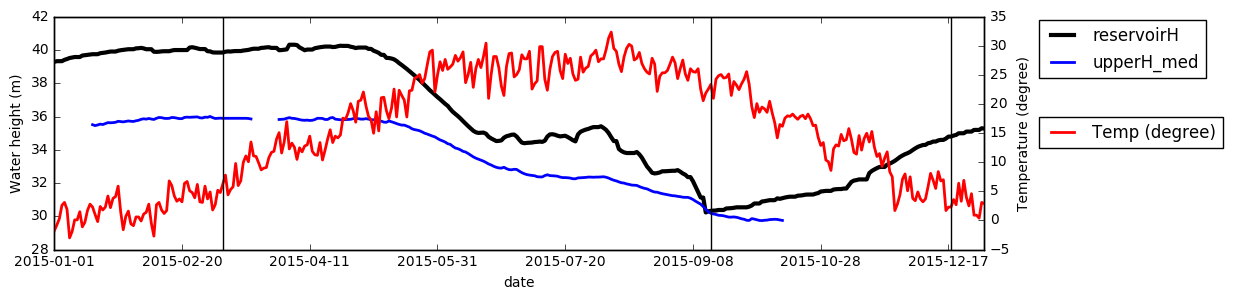

In [4]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1, color='k', linestyle='-', lw=3)
df.plot(figsize=(12,3), x='date', y='upperH_med', ax=ax1, color='b', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='Temp (degree)', ax=ax1_1, color='r', linestyle='-', lw=2)
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
itime_ref0 = 351
itime_ref1 = 257
itime_ref2 = 66

ax1_1.plot(np.r_[itime_ref0, itime_ref0], np.r_[-5, 35], 'k-')
ax1_1.plot(np.r_[itime_ref1, itime_ref1], np.r_[-5, 35], 'k-')
ax1_1.plot(np.r_[itime_ref2, itime_ref2], np.r_[-5, 35], 'k-')

ax1.set_ylabel("Water height (m)")
ax1_1.set_ylabel("Temperature (degree)")
print df['date'].values[itime_ref0]
print df['date'].values[itime_ref1]
print df['date'].values[itime_ref2]

In [5]:
elecind = [1, 10, 30, 50, 70, 90]

/Users/sklim/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


(50, 100)

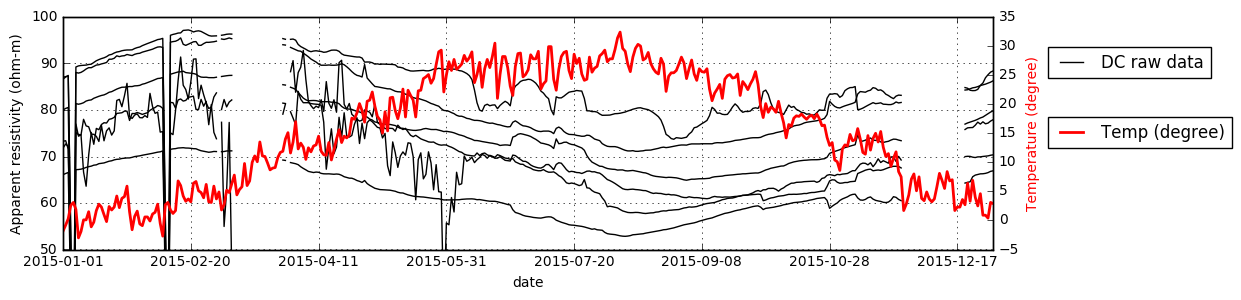

In [6]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df_DC.plot(figsize=(12,3), x='date', y=electrodeID[elecind], ax=ax1, colors=['k', 'k', 'k'])
df.plot(figsize=(12,3), x='date', y='Temp (degree)', ax=ax1_1, color='r', linestyle='-', lw=2)
ax1.legend(("DC raw data", ), loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
ax1.set_yscale('linear')
ax1.grid(True)
ax1.set_ylabel("Apparent resistivity (ohm-m)")
ax1_1.set_ylabel("Temperature (degree)", color="red")
ax1.set_ylim(50, 100)

In [7]:
# ax1 = plt.subplot(111)
# df_DCstd.plot(figsize=(12,3), x='date', y=electrodeID[elecind], ax=ax1, colors=['k', 'b', 'r'], linestyle="-", marker='.', lw=1)
# ax1.set_yscale('log')
# ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))

In [8]:
txrxID =  df_DC.keys()[1:-1]
xmasking = lambda x: np.ma.masked_where(np.isnan(x.values), x.values) 

In [9]:
#x= electrodeID[elecind] 
x= df_DC[txrxID]
max3 = pd.rolling_max(x, 3)

/Users/sklim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_max is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).max()
  app.launch_new_instance()


In [10]:
from ipywidgets import interact

In [11]:
# making matrix like max3 (but with zeros)
newdata = np.zeros_like(max3)

In [12]:
newdata.shape

(365, 380)

In [13]:
ndata = newdata.shape[1]
for i in range(ndata):
    x= df_DC[txrxID[i]]
    #median10 = pd.rolling_median(x, 6)
    mean10 = pd.rolling_max(x, 3)
    # Masking array having NaN
    xm = xmasking(mean10)
    kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = x[0],
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=1)
    # Use the observed values of the price to get a rolling mean
    state_means, _ = kf.filter(xm)    
    newdata[:,i] = state_means.flatten()

/Users/sklim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).max()


In [14]:
df_DC_new = df_DC.copy()  
for i,index in enumerate(txrxID):
    df_DC_new.loc[:,index] = newdata[:,i].flatten()
# df_DC_new.to_csv("../data/ChungCheonDC/CompositeDCdata_processed.csv")

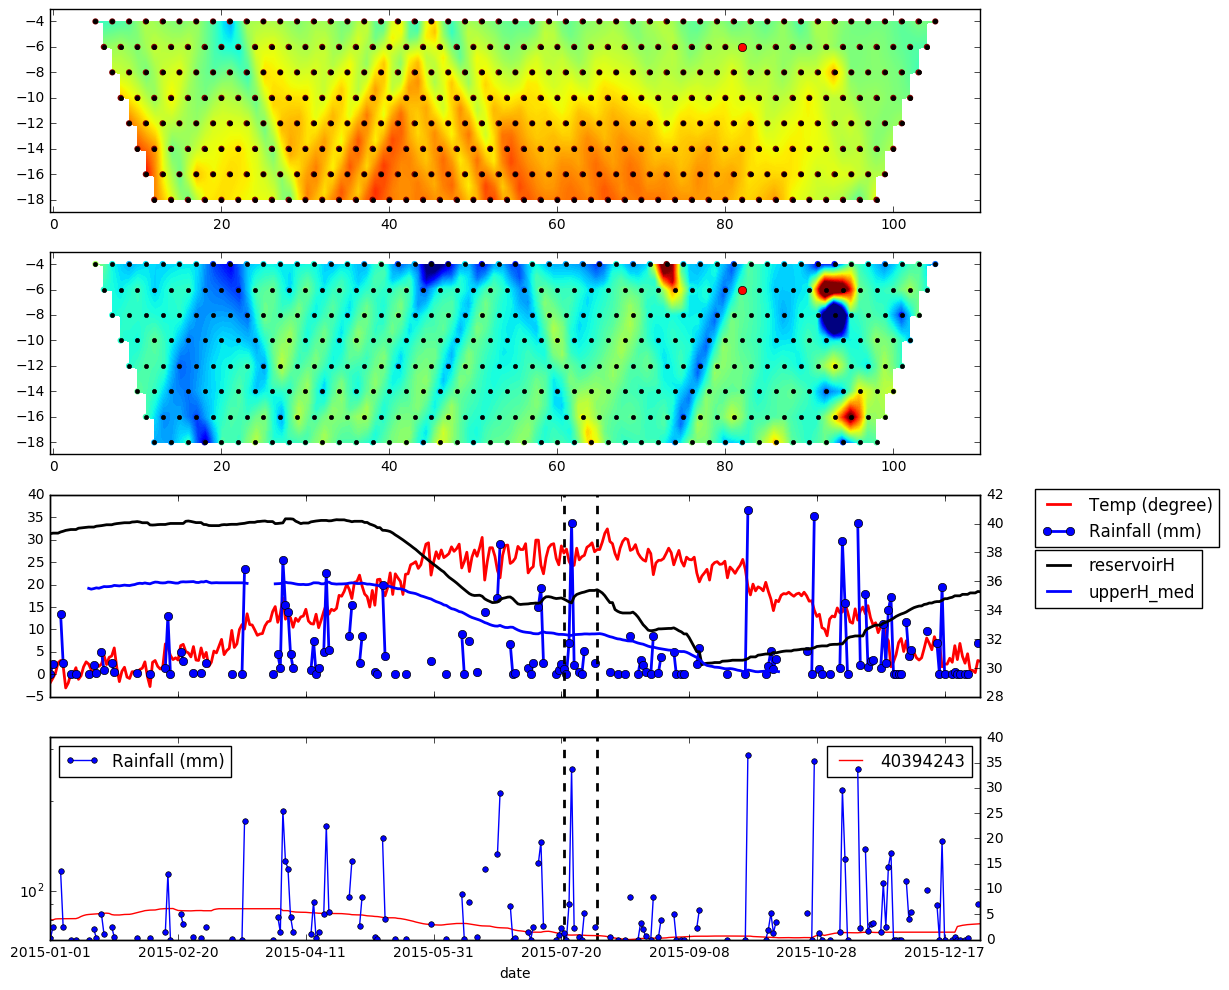

In [22]:
from ipywidgets import interact, IntSlider, ToggleButtons
itime = 201
itime_ref = 201
print df['date'].values[itime]
elecind = [5, 150,200]
 

# vizDCtimeSeries(elecind, itime, itime_ref, ['k','b','r'])
viz = lambda idatum, itime, flag: vizDCtimeSeries([idatum], itime, itime_ref, ['r'], flag, df_DC_new)
interact(viz, idatum=IntSlider(min=0, max=379, step=1, value=144)\
         ,itime=IntSlider(min=0, max=360, step=1, value=201)\
         ,flag=ToggleButtons(options=["std", "rho"]))

In [16]:
print df['date'].values[itime_ref]

2015-07-21


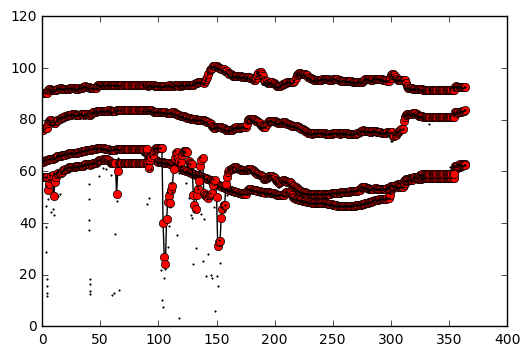

In [17]:
for i in range(0,379,100):
    x= df_DC[txrxID[i]]
    x1 = df_DC_new[txrxID[i]]
    plt.plot(newdata[:,i], 'k')
    plt.plot(x1, 'ro')    
    plt.plot(x, 'k.', ms=2)    

/Users/sklim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).max()


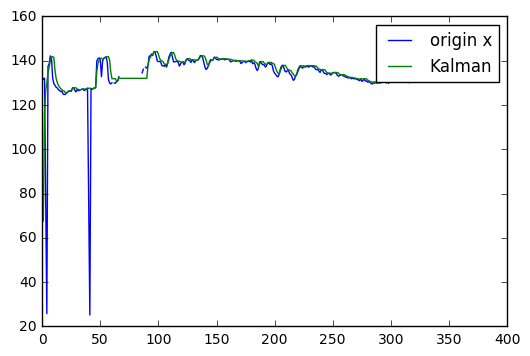

In [18]:
i = 245
x= df_DC[txrxID[i]]
#median10 = pd.rolling_median(x, 6)
mean10 = pd.rolling_max(x, 3)
#x1 = median10
#x2 = mean10
# Masking array having NaN
xm = xmasking(mean10)
# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 67.6,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=1)
# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(xm)

#plt.plot(x1)
plt.plot(x)
#plt.plot(x1)
#plt.plot(x2)
plt.plot(state_means)
plt.legend([  'origin x','Kalman'])

In [19]:
 y='Rainfall (mm)'    

In [20]:
print y

Rainfall (mm)


/Users/sklim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).max()


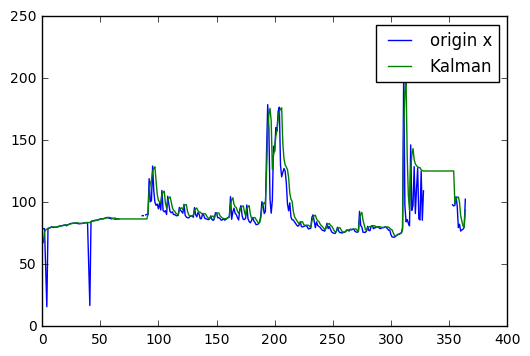

In [21]:
i = 144


x= df_DC[txrxID[i]]
#median10 = pd.rolling_median(x, 6)
mean10 = pd.rolling_max(x, 3)
#x1 = median10
#x2 = mean10
# Masking array having NaN
xm = xmasking(mean10)
# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 67.6,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=1)
# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(xm)

#plt.plot(x1)
plt.plot(x)
#plt.plot(x1)
#plt.plot(x2)
plt.plot(state_means)
plt.legend([  'origin x','Kalman'])